Data loading, pre-processing and representation
---



In [2]:
#adding libraries
from sklearn import linear_model  
from sklearn.linear_model import LinearRegression  
import csv          
import requests     
import numpy as np  
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
import pandas

In [3]:
my_dataset = pd.read_csv('diabetes.csv')
#Representing datatypes of the dataset columns
print(my_dataset.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


### Datatype matching

In [4]:
# In the dataset there are no categorical feature, therefore, datatypes don't need to be changed
print(my_dataset.dtypes) 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


###Representing and analysing data about the dataset

In [5]:

print(my_dataset.describe())
print(my_dataset.info()) 

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

You can see above that there are two data objects in the dataset with missing values for the attributes "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g". To obtain the values, we replace the missing values by the mean value of the attribute


###Replacing missing values

In [6]:
#In our dataset neither object misses a feature, so the functions for willing blanks are not needed
#On the other hand there are some outliers which are replaced with the mean values
my_dataset['BloodPressure'].replace(0, my_dataset['BloodPressure'].mean(), inplace=True)
my_dataset['SkinThickness'].replace(0, my_dataset['SkinThickness'].mean(), inplace=True)
my_dataset['BMI'].replace(0, my_dataset['BMI'].mean(), inplace=True)
print(my_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB
None


In [7]:
#For attributes of categorical type, the values are checked against possible values
print(my_dataset['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [9]:
#Creating a dataset where labels are excluded leaving feature columns only
clustering_dataset = my_dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

###Data normalization

In [10]:
#Data normalisation is applied for four attributes to make the data more consistent
my_dataset['Pregnancies'] = (my_dataset['Pregnancies'] - my_dataset['Pregnancies'].min())/(my_dataset['Pregnancies'].max() - my_dataset['Pregnancies'].min())
my_dataset['Glucose'] = (my_dataset['Glucose'] - my_dataset['Glucose'].min())/(my_dataset['Glucose'].max() - my_dataset['Glucose'].min())
my_dataset['BloodPressure'] = (my_dataset['BloodPressure'] - my_dataset['BloodPressure'].min())/(my_dataset['BloodPressure'].max() - my_dataset['BloodPressure'].min())
my_dataset['SkinThickness'] = (my_dataset['SkinThickness'] - my_dataset['SkinThickness'].min())/(my_dataset['SkinThickness'].max() - my_dataset['SkinThickness'].min())
my_dataset['Insulin'] = (my_dataset['Insulin'] - my_dataset['Insulin'].min())/(my_dataset['Insulin'].max() - my_dataset['Insulin'].min())
my_dataset['BMI'] = (my_dataset['BMI'] - my_dataset['BMI'].min())/(my_dataset['BMI'].max() - my_dataset['BMI'].min())
my_dataset['DiabetesPedigreeFunction'] = (my_dataset['DiabetesPedigreeFunction'] - my_dataset['DiabetesPedigreeFunction'].min())/(my_dataset['DiabetesPedigreeFunction'].max() - my_dataset['DiabetesPedigreeFunction'].min())
my_dataset['Age'] = (my_dataset['Age'] - my_dataset['Age'].min())/(my_dataset['Age'].max() - my_dataset['Age'].min())
print(my_dataset.head(10))
print(my_dataset.describe())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.489796       0.304348  0.000000  0.314928   
1     0.058824  0.427136       0.428571       0.239130  0.000000  0.171779   
2     0.470588  0.919598       0.408163       0.147135  0.000000  0.104294   
3     0.058824  0.447236       0.428571       0.173913  0.111111  0.202454   
4     0.000000  0.688442       0.163265       0.304348  0.198582  0.509202   
5     0.294118  0.582915       0.510204       0.147135  0.000000  0.151329   
6     0.176471  0.391960       0.265306       0.271739  0.104019  0.261759   
7     0.588235  0.577889       0.460260       0.147135  0.000000  0.349693   
8     0.117647  0.989950       0.469388       0.413043  0.641844  0.251534   
9     0.470588  0.628141       0.734694       0.147135  0.000000  0.282057   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333        1  
1                  0.116567  0.166667      

# Artificial Neural Networks

1st model: 2 hidden layers with 32 neurons in each, learning rate is equal to 0.05

In [19]:
# library import for splitting the dataset into training and testing parts
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
# separate target labels from the dataset
targets = my_dataset['Outcome']
# how much percentage of the dataset will be used for training
training_proportion = 0.7
# splitting the dataset into test and training sets
X_train, X_test, y_train, y_test = train_test_split(clustering_dataset, targets, test_size=1-training_proportion, random_state=42)
model_1 = MLPClassifier(hidden_layer_sizes=(32,32), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.05, verbose=1)
model_1.fit(X_train, y_train)

Iteration 1, loss = 0.65101889
Iteration 2, loss = 0.64827720
Iteration 3, loss = 0.64568809
Iteration 4, loss = 0.64402322
Iteration 5, loss = 0.64241625
Iteration 6, loss = 0.64039590
Iteration 7, loss = 0.64088291
Iteration 8, loss = 0.63794517
Iteration 9, loss = 0.63392548
Iteration 10, loss = 0.63141680
Iteration 11, loss = 0.62909683
Iteration 12, loss = 0.62763778
Iteration 13, loss = 0.62551203
Iteration 14, loss = 0.62130979
Iteration 15, loss = 0.61871486
Iteration 16, loss = 0.61693477
Iteration 17, loss = 0.61634226
Iteration 18, loss = 0.61563956
Iteration 19, loss = 0.60685295
Iteration 20, loss = 0.60249633
Iteration 21, loss = 0.60270567
Iteration 22, loss = 0.59805127
Iteration 23, loss = 0.59392892
Iteration 24, loss = 0.58948049
Iteration 25, loss = 0.58865102
Iteration 26, loss = 0.59018521
Iteration 27, loss = 0.58159274
Iteration 28, loss = 0.58374701
Iteration 29, loss = 0.57331921
Iteration 30, loss = 0.57563696
Iteration 31, loss = 0.57401204
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(64, 64),
              learning_rate_init=0.05, max_iter=500, solver='sgd', verbose=1)

####Performance analysis

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       151
           1       0.62      0.42      0.50        80

    accuracy                           0.71       231
   macro avg       0.68      0.64      0.65       231
weighted avg       0.70      0.71      0.69       231



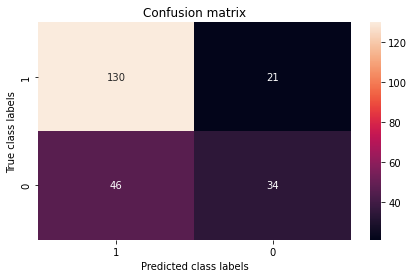

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import pylab as pl
y_predictions_1 = model.predict(X_test)
print(classification_report(y_test, y_predictions_1, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_1)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

#### The confusion matrix shows that 46 data objects with label 1 was mistakenly classified as 0, and 21 data objects with label 1 was classified as 0. In total: 67 out of 231 data objects were misclassified: overall accuracy 71%. 

2nd model: hidden layers sizes are icreased up to 86 neurons each

In [37]:
model_2 = MLPClassifier(hidden_layer_sizes=(86,86), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.05, verbose=1)
model_2.fit(X_train, y_train)

Iteration 1, loss = 0.66989598
Iteration 2, loss = 0.64802409
Iteration 3, loss = 0.65052690
Iteration 4, loss = 0.64468647
Iteration 5, loss = 0.64217291
Iteration 6, loss = 0.64060836
Iteration 7, loss = 0.63715729
Iteration 8, loss = 0.63538911
Iteration 9, loss = 0.63333410
Iteration 10, loss = 0.63198359
Iteration 11, loss = 0.62856286
Iteration 12, loss = 0.62425243
Iteration 13, loss = 0.62165855
Iteration 14, loss = 0.61716883
Iteration 15, loss = 0.61362134
Iteration 16, loss = 0.61415719
Iteration 17, loss = 0.60986594
Iteration 18, loss = 0.60161751
Iteration 19, loss = 0.59764334
Iteration 20, loss = 0.59491600
Iteration 21, loss = 0.58901149
Iteration 22, loss = 0.59364699
Iteration 23, loss = 0.58525718
Iteration 24, loss = 0.58470424
Iteration 25, loss = 0.57740283
Iteration 26, loss = 0.57727368
Iteration 27, loss = 0.57685382
Iteration 28, loss = 0.57384471
Iteration 29, loss = 0.57788711
Iteration 30, loss = 0.57259536
Iteration 31, loss = 0.55949665
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(86, 86),
              learning_rate_init=0.05, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.69      0.95      0.80       151
           1       0.65      0.19      0.29        80

    accuracy                           0.68       231
   macro avg       0.67      0.57      0.54       231
weighted avg       0.68      0.68      0.62       231



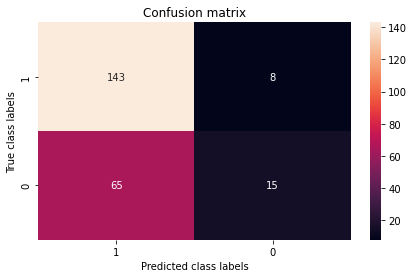

In [38]:
y_predictions_2 = model_2.predict(X_test)
print(classification_report(y_test, y_predictions_2, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_2)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

#### The accuracy of the second model is only 68%: this model overfits the training data due to the too large number of neurons

3rd model: one hidden layer with 64 neurons, learning rate is 0.01

In [65]:
model_3 = MLPClassifier(hidden_layer_sizes=(64), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.1, verbose=1)
model_3.fit(X_train, y_train)

Iteration 1, loss = 0.75783236
Iteration 2, loss = 0.63868935
Iteration 3, loss = 0.61545076
Iteration 4, loss = 0.63562619
Iteration 5, loss = 0.61681893
Iteration 6, loss = 0.61249702
Iteration 7, loss = 0.64311019
Iteration 8, loss = 0.59304284
Iteration 9, loss = 0.59497420
Iteration 10, loss = 0.60447321
Iteration 11, loss = 0.58449405
Iteration 12, loss = 0.58383905
Iteration 13, loss = 0.61862493
Iteration 14, loss = 0.61156352
Iteration 15, loss = 0.59664136
Iteration 16, loss = 0.61469152
Iteration 17, loss = 0.59211152
Iteration 18, loss = 0.58460770
Iteration 19, loss = 0.59021190
Iteration 20, loss = 0.57865582
Iteration 21, loss = 0.58612902
Iteration 22, loss = 0.59546801
Iteration 23, loss = 0.60058787
Iteration 24, loss = 0.60982985
Iteration 25, loss = 0.60788255
Iteration 26, loss = 0.58351318
Iteration 27, loss = 0.57282533
Iteration 28, loss = 0.61568787
Iteration 29, loss = 0.58766348
Iteration 30, loss = 0.57337003
Iteration 31, loss = 0.57821990
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=64,
              learning_rate_init=0.1, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.67      0.95      0.78       151
           1       0.50      0.10      0.17        80

    accuracy                           0.65       231
   macro avg       0.58      0.52      0.47       231
weighted avg       0.61      0.65      0.57       231



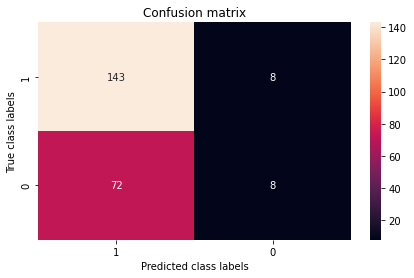

In [66]:
y_predictions_3 = model_3.predict(X_test)
print(classification_report(y_test, y_predictions_3, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_3)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

The accuracy of this model is only 65%: learning rate is too high in this model

model 4: one hidden layer with 32 neurons, learning rate is 0.02

In [97]:
model_4 = MLPClassifier(hidden_layer_sizes=(32), max_iter=500, activation='logistic', solver='sgd', learning_rate_init=0.02, verbose=1)
model_4.fit(X_train, y_train)

Iteration 1, loss = 0.66039962
Iteration 2, loss = 0.63706309
Iteration 3, loss = 0.62923695
Iteration 4, loss = 0.62351355
Iteration 5, loss = 0.61833784
Iteration 6, loss = 0.61192106
Iteration 7, loss = 0.60771052
Iteration 8, loss = 0.60391001
Iteration 9, loss = 0.60176378
Iteration 10, loss = 0.59762838
Iteration 11, loss = 0.59958515
Iteration 12, loss = 0.59316108
Iteration 13, loss = 0.58819953
Iteration 14, loss = 0.58597312
Iteration 15, loss = 0.58671010
Iteration 16, loss = 0.57600575
Iteration 17, loss = 0.57467685
Iteration 18, loss = 0.57696244
Iteration 19, loss = 0.57298362
Iteration 20, loss = 0.57802831
Iteration 21, loss = 0.56673762
Iteration 22, loss = 0.56452189
Iteration 23, loss = 0.57155119
Iteration 24, loss = 0.57171597
Iteration 25, loss = 0.57598440
Iteration 26, loss = 0.57408450
Iteration 27, loss = 0.56742212
Iteration 28, loss = 0.56334947
Iteration 29, loss = 0.55992126
Iteration 30, loss = 0.56142983
Iteration 31, loss = 0.55482916
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=32,
              learning_rate_init=0.02, max_iter=500, solver='sgd', verbose=1)

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       151
           1       0.61      0.34      0.44        80

    accuracy                           0.70       231
   macro avg       0.67      0.61      0.61       231
weighted avg       0.68      0.70      0.67       231

[[134  17]
 [ 53  27]]


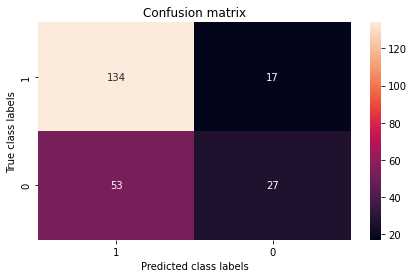

In [101]:
y_predictions_4 = model_4.predict(X_test)
print(classification_report(y_test, y_predictions_4, zero_division=0))
conf_matrix = confusion_matrix(y_test, y_predictions_4)
print(conf_matrix)
fig, ax = pl.subplots(figsize=(7,4))
sns.heatmap(conf_matrix, annot = True, fmt = 'g', ax = ax);
ax.set_xlabel('Predicted class labels');
ax.set_ylabel('True class labels');
ax.set_title('Confusion matrix');
ax.xaxis.set_ticklabels(my_dataset['Outcome'].unique());
ax.yaxis.set_ticklabels(my_dataset['Outcome'].unique());

The accuracy of this model is 70%, it performed slightly worse then the first one. Therefore, after conducted experiments the first model is declared as the most accurate and reliable model out of 4 models tested. 